Import necessary packages

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [3]:
df0 = pd.read_csv("C:/Users/Sindhu/Downloads/HR_dataset/HR_comma_sep.csv")

Gather basic information about the data

In [4]:
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Rename column time_spend_company

In [7]:
df0 = df0.rename(columns={'time_spend_company':'tenure','average_montly_hours':'average_monthly_hours'})

In [8]:
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check for null values in data set

In [9]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Check for duplicate values in dataset

In [10]:
df0.duplicated().sum()

3008

There are 3000 duplicate rows, check if the values can be removed

In [11]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


As it is very unlikely that two exmployess self reported same values for every column, it is safe to remove the duplicates

In [12]:
df1 = df0.drop_duplicates(keep='first')

In [13]:

df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check for outliers in the data

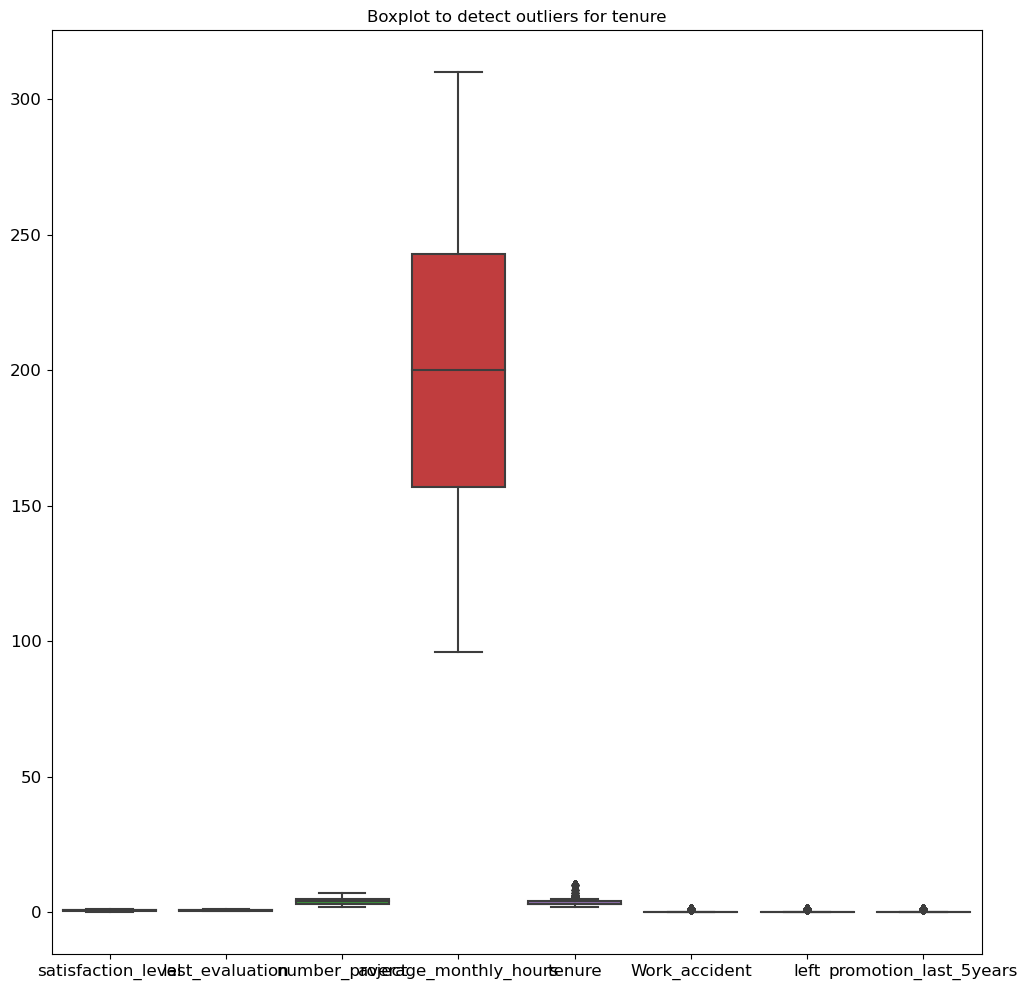

In [14]:
plt.figure(figsize=(12,12))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(data = df1)
plt.show()

The boxplot of entire dataset shows tenure has outliers. Investigating tenure variable

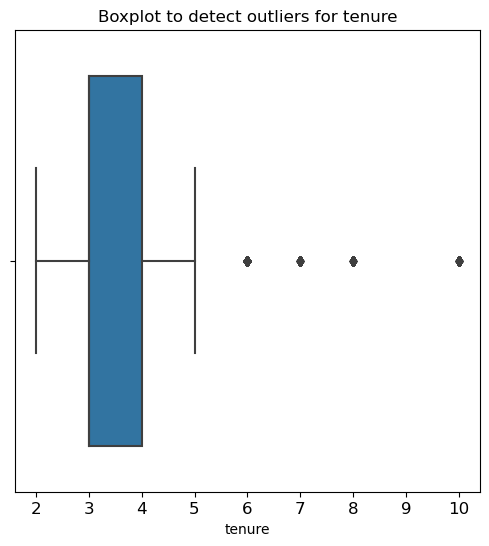

In [15]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Investigating how many rows contain outliers

In [16]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25
upperlimit = percentile75 + 1.5 *iqr
lowerlimit = percentile25 - 1.5 * iqr
print('upper limit', upperlimit)
print('lower limit', lowerlimit)
outliers = df1[(df1['tenure']>upperlimit)|(df1['tenure']< lowerlimit)]
print('Number of outliers', len(outliers))

upper limit 5.5
lower limit 1.5
Number of outliers 824


Examine variables and plot replationship between them.
Firstly, consider the number of projects employee worked, comparing employees who left vs those stayed

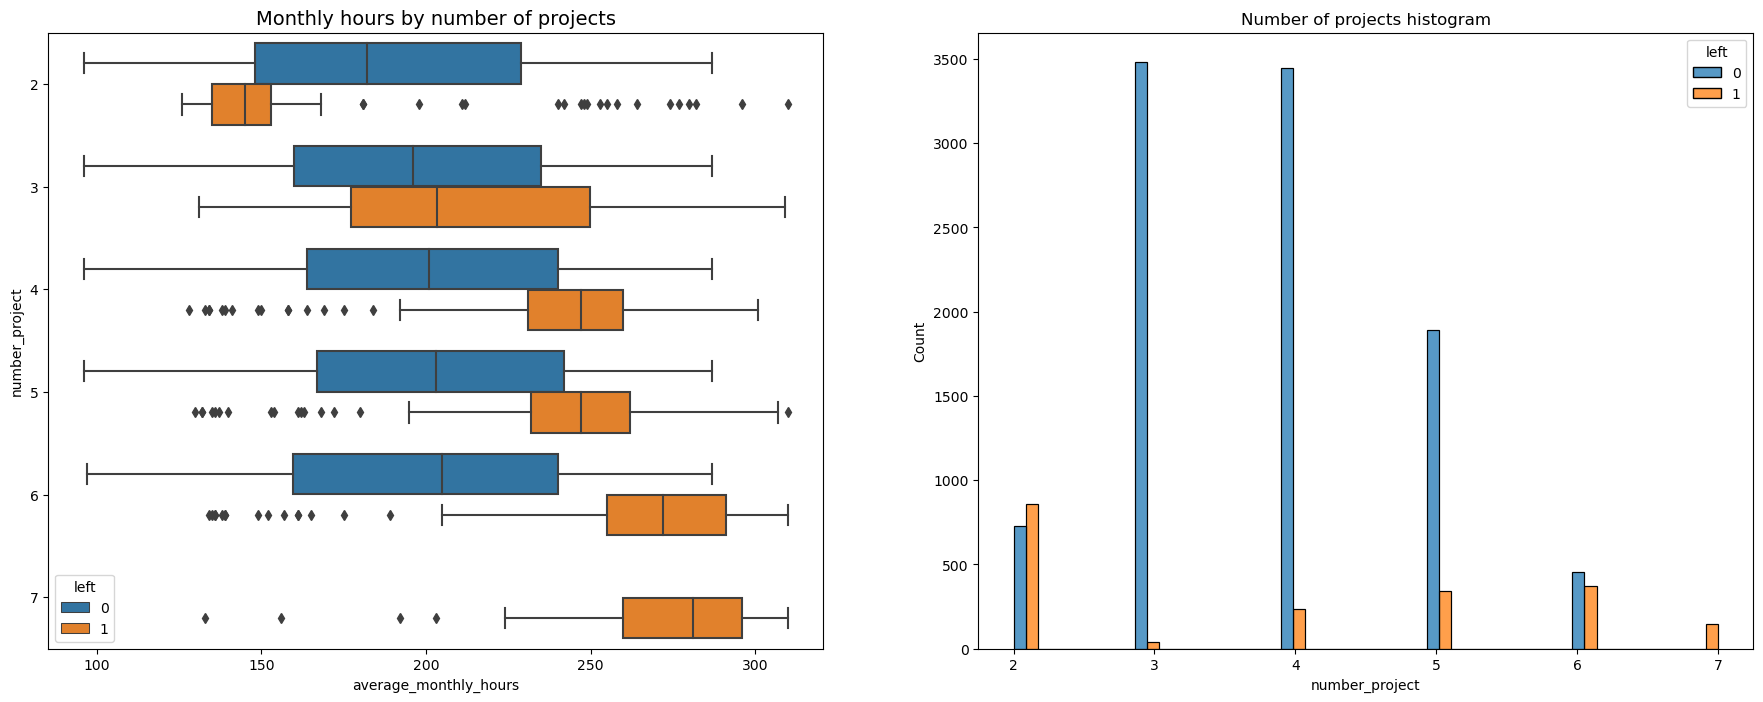

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
sns.histplot(data=df1, x='number_project', hue='left',multiple='dodge',ax=ax[1])
ax[1].set_title('Number of projects histogram')
plt.show()



Looking at the above visualization, two types of employees left 1) employees who worked much more than the others and 2) employees who wroked less than others for same number of projects assigned.
Also all of the employees who worked seven projects left the company.


Let's analyze the relationship between tenure and satisfaction level

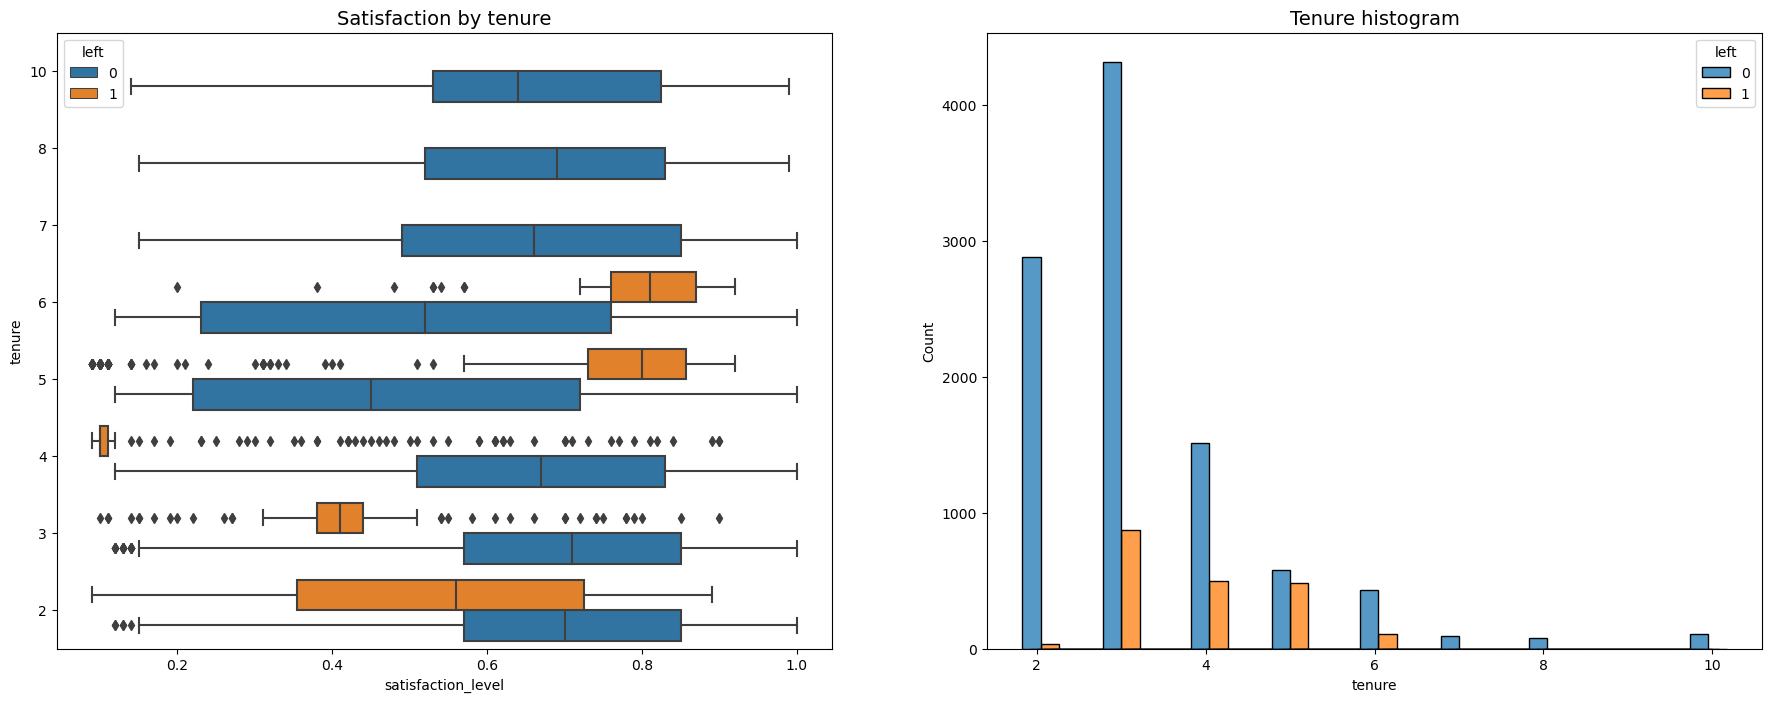

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')


sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5,ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Employees who left fall under dissatisfied with shorter tenure

Let's investigate how employees left are distributed across departments

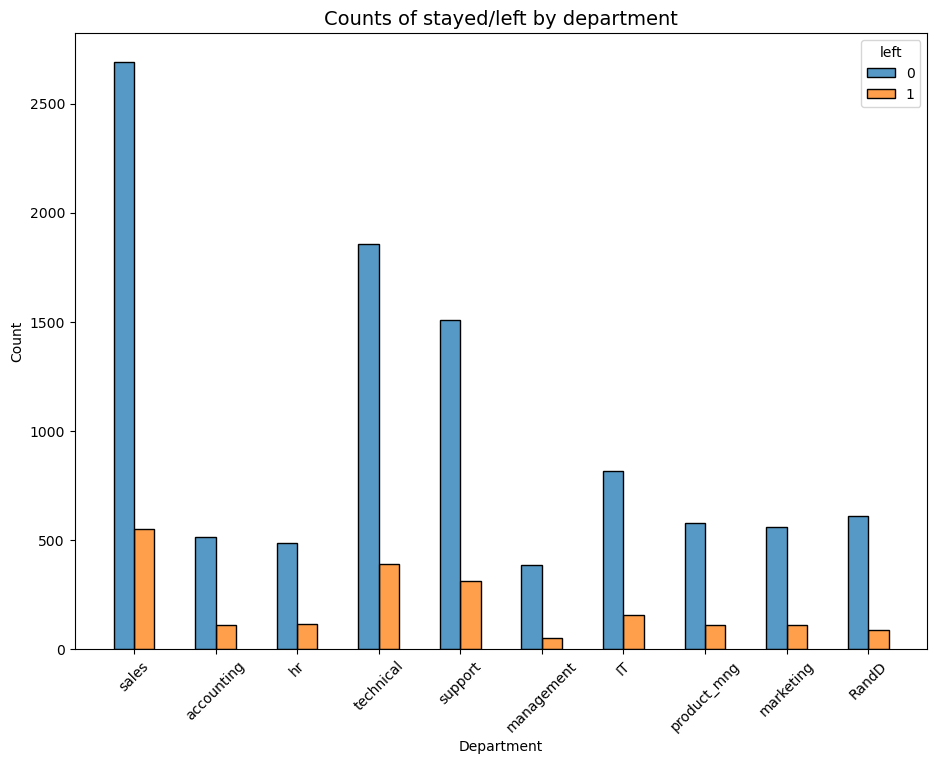

In [19]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='left', discrete=1, multiple='dodge',shrink=.5).set_title('Counts of stayed/left by department', fontsize=14)
plt.xticks(rotation=45)
plt.show()


There does not seem to be a department with significant difference in employees who left vs those stayed

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_688\343538081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax= sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")


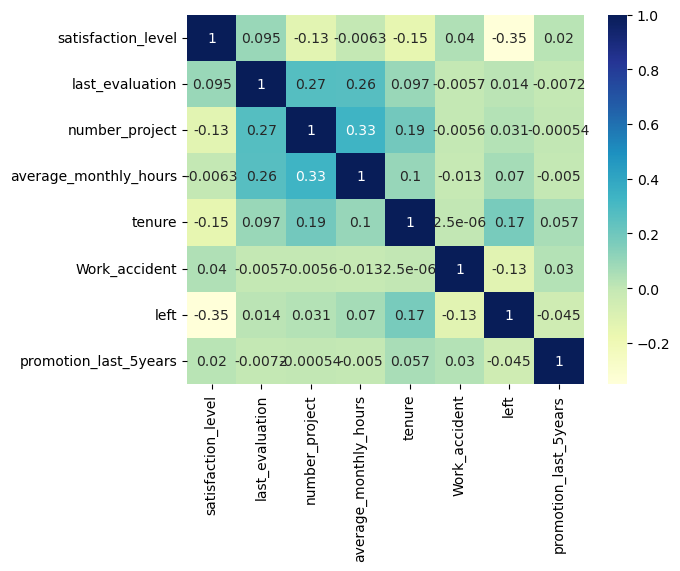

In [20]:
ax= sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

Insights
It appears that long working hours, more number of projects are driving the low satisfaction score and in turn causing the employees to leave.

Build a model to predict whether an employee leaves the company.
Sice the variable we want to predict ("left") is categorical, we will be using logistic regression. 

Convert the variables to categorical variables using one hot encoding as needed

In [21]:
df2 = pd.get_dummies(df1, columns=['salary','Department'],drop_first=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Since logistic regression is sensitive to outliers, it is best to remove the outliers identified earlier in the tenure variable.

In [22]:
df3 = df2[(df2['tenure']>=lowerlimit)&(df2['tenure']<=upperlimit)]
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


Define X and Y variabled to build the model


In [23]:
y = df3['left']
y.head()


0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [24]:
X = df3[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical']]
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,1,0,0,0,0,0,0,0,1,0,0


Split the data into training and testing set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct logistic regression model and fit the training set


In [26]:
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test themodel using test set

In [27]:
y_pred = clf.predict(X_test)

Construct confusion matrix to visualize the model results

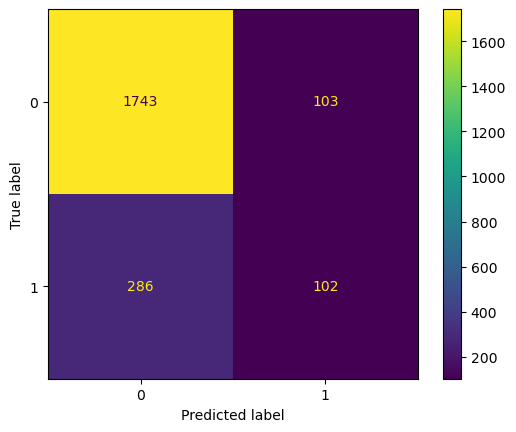

In [28]:
log_cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=clf.classes_)
log_disp.plot()
plt.show()

Create classificatio report for the model


In [29]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.50      0.26      0.34       388

                 accuracy                           0.83      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.83      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 80% and accuracy of 83%.

Modeling Approach 2: Tree-based model

Define and X and y

In [30]:
y = df3['left']
X = df3.drop(['left'],axis = 1)

Create test, train and validate data

In [38]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify = y_train)

Create Decison tree model and set up cross-validated grid-search to find the best model parameters

In [47]:
tree = DecisionTreeClassifier()
## hyperparameter tuning
cv_params = {'max_depth':[4,6,8,None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

clf_gs = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [48]:
clf_gs.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

Print the results

In [49]:
cv_results = pd.DataFrame(clf_gs.cv_results_)
best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy
roc_auc = best_estimator_results.mean_test_roc_auc
    
print('f1 score: ',f1,' recall: ',recall,' precision: ',precision,' accuracy: ',accuracy, ' roc_auc: ', roc_auc)

f1 score:  0.9285241429431865  recall:  0.9088791643139469  precision:  0.9491148717921616  accuracy:  0.9764208932780623  roc_auc:  0.9722186833073777


The above parameters indicate a good model performance
We will implement random forest model to avoid overfitting by decision trees.

In [44]:
rf = RandomForestClassifier()
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [45]:
rf1.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

In [52]:
cv_results_rf = pd.DataFrame(rf1.cv_results_)
best_estimator_results = cv_results_rf.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

f1_rf= best_estimator_results.mean_test_f1
recall_rf = best_estimator_results.mean_test_recall
precision_rf = best_estimator_results.mean_test_precision
accuracy_rf = best_estimator_results.mean_test_accuracy
roc_auc_rf = best_estimator_results.mean_test_roc_auc
    
#print('f1 score: ',f1_rf,' recall: ',recall_rf,' precision: ',precision_rf,' accuracy: ',accuracy_rf, ' roc_auc: ', roc_auc_rf)

In [51]:
tree1_preds = clf_gs.best_estimator_.predict(X_val)
rf1_preds = rf1.best_estimator_.predict(X_val)

auc_tree1 = round(roc_auc_score(y_val, tree1_preds), 3)
accuracy_tree1 = round(accuracy_score(y_val, tree1_preds), 3)
precision_tree1 = round(precision_score(y_val, tree1_preds), 3)
recall_tree1 = round(recall_score(y_val, tree1_preds), 3)
f1_tree1 = round(f1_score(y_val, tree1_preds), 3)
print('Decision Trees','auc: ', auc_tree1, ' accuracy: ',accuracy_tree1,' precision: ',precision_tree1,' recall: ',recall_tree1,' f1: ',f1_tree1)

auc_rf1 = round(roc_auc_score(y_val, rf1_preds), 3)
accuracy_rf1 = round(accuracy_score(y_val, rf1_preds), 3)
precision_rf1 = round(precision_score(y_val, rf1_preds), 3)
recall_rf1 = round(recall_score(y_val, rf1_preds), 3)
f1_rf1 = round(f1_score(y_val, rf1_preds), 3)
print('Random Forest','auc: ', auc_rf1, ' accuracy: ',accuracy_rf1,' precision: ',precision_rf1,' recall: ',recall_rf1,' f1: ',f1_rf1)


Decision Trees auc:  0.963  accuracy:  0.98  precision:  0.944  recall:  0.937  f1:  0.94
Random Forest auc:  0.964  accuracy:  0.983  precision:  0.966  recall:  0.934  f1:  0.95


On validation set, random forest perfoms better than decision tree. We will test the model against the test data.

In [54]:
rf1_test_preds = rf1.best_estimator_.predict(X_test)

auc_rf1_test = round(roc_auc_score(y_test, rf1_test_preds), 3)
accuracy_rf1_test = round(accuracy_score(y_test, rf1_test_preds), 3)
precision_rf1_test = round(precision_score(y_test, rf1_test_preds), 3)
recall_rf1_test = round(recall_score(y_test, rf1_test_preds), 3)
f1_rf1_test = round(f1_score(y_test,rf1_test_preds), 3)
print('Random Forest','auc: ', auc_rf1_test, ' accuracy: ',accuracy_rf1_test,' precision: ',precision_rf1_test,' recall: ',recall_rf1_test,' f1: ',f1_rf1_test)

Random Forest auc:  0.962  accuracy:  0.984  precision:  0.974  recall:  0.929  f1:  0.951


The validation scores and test scores are similar, which indicates that it is a stron model and the performance on the test data in indicative of its perfomance on unseen data.